In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## **1. Problem Definition:**

We will choose MNIST Dataset (28x28)

## **2. Data Preprocessing**

In [2]:
# Load dataset
mnist = fetch_openml('mnist_784')

In [3]:
# information about the dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.frame.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


### **2.1 Load the dataset and check for missing values, and handle them**

In [5]:
# converting the data to pandas data frame
df = pd.DataFrame(mnist.frame)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [6]:
df.isna().sum() # checking for NAN values

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       0
Length: 785, dtype: int64

In [7]:
df.isnull().sum() # checking for null values

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       0
Length: 785, dtype: int64

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 418.8 MB


In [9]:
# spliting the data into features and class
X = df.drop(columns="class")
y = df["class"]

In [10]:
y.astype('int').dtypes

dtype('int32')

In [11]:
#converting features data type from float64 to float32 for optimized computation on gpu
X.astype("float32").dtypes

pixel1      float32
pixel2      float32
pixel3      float32
pixel4      float32
pixel5      float32
             ...   
pixel780    float32
pixel781    float32
pixel782    float32
pixel783    float32
pixel784    float32
Length: 784, dtype: object

### **2.2 Split the dataset into training and testing sets**

In [12]:
# spliting the data training and test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.3)

### **2.3 Exploratory Data Analysis (EDA)**

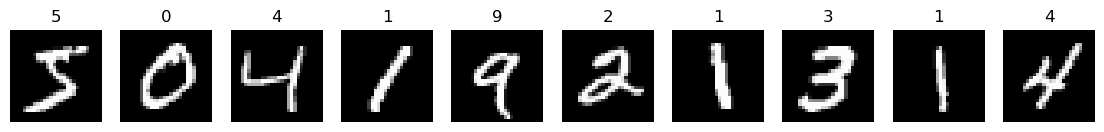

In [23]:
# ploting  10 sample digits

X_plot = np.array(X)

fig, axes = plt.subplots(1, 10, figsize=(14, 8))

for i in range(10):
    axes[i].imshow(X_plot[i].reshape(28,28), cmap = 'gray')
    axes[i].axis("off")
    axes[i].set_title(str(y[i]))

plt.show()

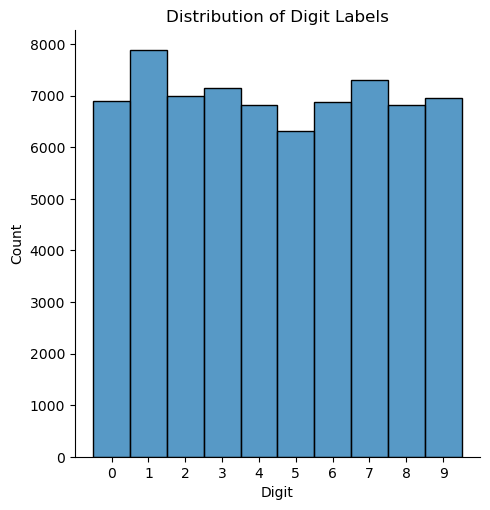

In [25]:
#class distribution

sns.displot(x=y)
plt.title("Distribution of Digit Labels")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

The plot shows there is class balance 

In [26]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Unique labels:", np.unique(y))

Shape of X: (70000, 784)
Shape of y: (70000,)
Unique labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## **3. Support Vector Machine (SVM)**

In [29]:
svm_models = {
    "SVM (RBF kernal)": SVC(kernel = "rbf"),
    "Linear SVM": SVC(kernel = 'linear'),
    "Polynomial SVM (degree 3)": SVC(kernel='poly', degree=3),
    "Polynomial SVM (degree 2)": SVC(kernel='poly', degree=2),
}

In [ ]:
print("\n====SVM models====\n")
for name, model in svm_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


====SVM models====

